In [2953]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.cluster import KMeans

In [2954]:
# Load the data
data = pd.read_csv('Anime.csv')
print(data.head())

   Rank                                               Name  \
0     1  Demon Slayer: Kimetsu no Yaiba - Entertainment...   
1     2                     Fruits Basket the Final Season   
2     3                                    Mo Dao Zu Shi 3   
3     4                   Fullmetal Alchemist: Brotherhood   
4     5                Attack on Titan 3rd Season: Part II   

                                     Japanese_name   Type  Episodes  \
0                    Kimetsu no Yaiba: Yuukaku-hen  TV          NaN   
1                          Fruits Basket the Final  TV         13.0   
2                       The Founder of Diabolism 3  Web        12.0   
3   Hagane no Renkinjutsushi: Full Metal Alchemist  TV         64.0   
4             Shingeki no Kyojin Season 3: Part II  TV         10.0   

              Studio Release_season  \
0           ufotable          Fall    
1  TMS Entertainment         Spring   
2   B.C MAY PICTURES            NaN   
3              Bones         Spring   
4    

In [2955]:
##Data Cleaning and Preprocessing

#Displaying the names of the columns
print(data.columns)

#Giving each studio a unique id number and add it to the data
studios = data['Studio'].unique()
studio_ids = range(1, len(studios) + 1)
studio_dict = dict(zip(studios, studio_ids))
data['Studio_ID'] = data['Studio'].map(studio_dict)
print(data.head())

#Making a csv with the studio id and the studio name
studio_id_map = pd.DataFrame(list(studio_dict.items()), columns=['Studio_ID', 'Studio'])
studio_id_map.to_csv('Studio_ID.csv', index=False)

#Removing unwanted data columns
columns_to_drop = ['End_year', 'staff', 'Voice_actors', 'Description', 'Name', 
                   'Japanese_name', 'Type', 'Tags', 'Related_Mange', 'Related_anime', 
                   'Rank', 'Release_season', 'Studio', 'Content_Warning']

data = data.drop(columns_to_drop, axis=1)

#Removing the rows with missing values
data = data.dropna()

#store and print the number of rows after removing the missing values
num_rows_cleaned = data.shape[0]

Index(['Rank', 'Name', 'Japanese_name', 'Type', 'Episodes', 'Studio',
       'Release_season', 'Tags', 'Rating', 'Release_year', 'End_year',
       'Description', 'Content_Warning', 'Related_Mange', 'Related_anime',
       'Voice_actors', 'staff'],
      dtype='object')
   Rank                                               Name  \
0     1  Demon Slayer: Kimetsu no Yaiba - Entertainment...   
1     2                     Fruits Basket the Final Season   
2     3                                    Mo Dao Zu Shi 3   
3     4                   Fullmetal Alchemist: Brotherhood   
4     5                Attack on Titan 3rd Season: Part II   

                                     Japanese_name   Type  Episodes  \
0                    Kimetsu no Yaiba: Yuukaku-hen  TV          NaN   
1                          Fruits Basket the Final  TV         13.0   
2                       The Founder of Diabolism 3  Web        12.0   
3   Hagane no Renkinjutsushi: Full Metal Alchemist  TV         64.0   
4

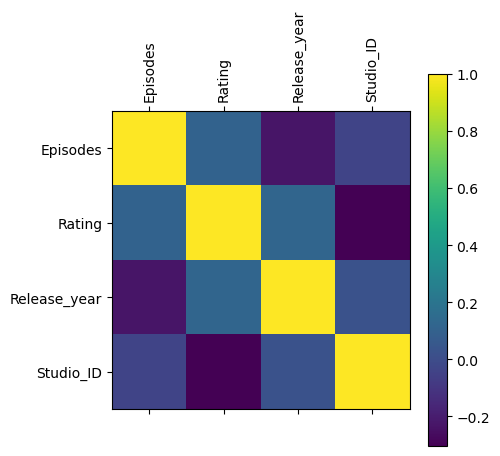

In [2956]:
##Correlation Matrix


# Plot the correlation matrix
correlation_matrix = data.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

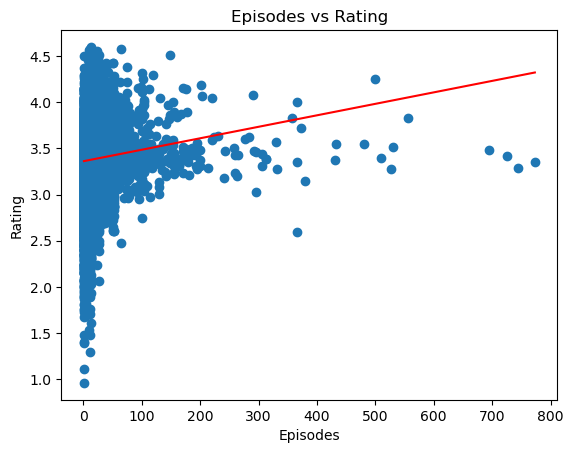

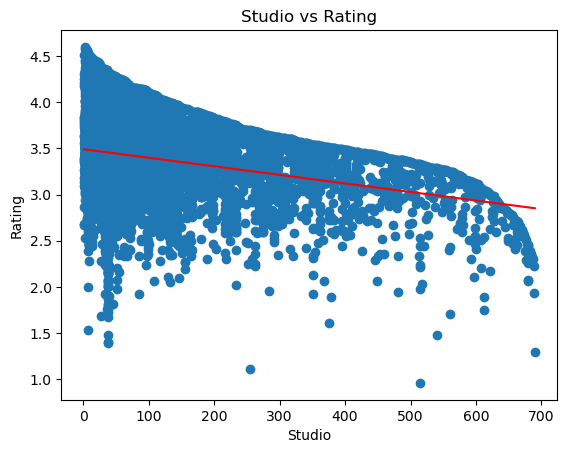

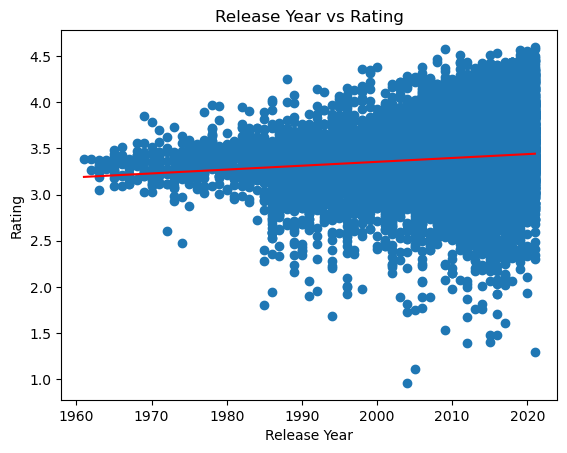

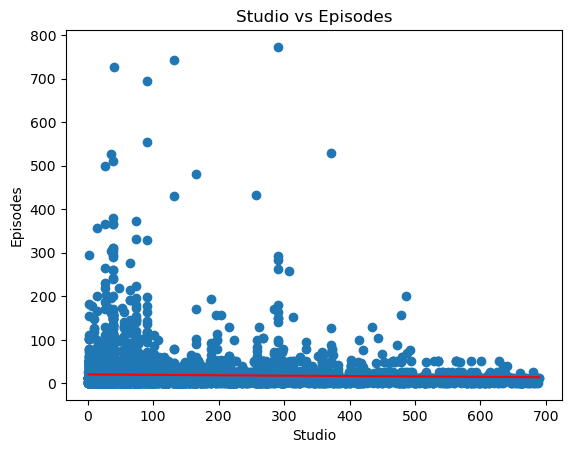

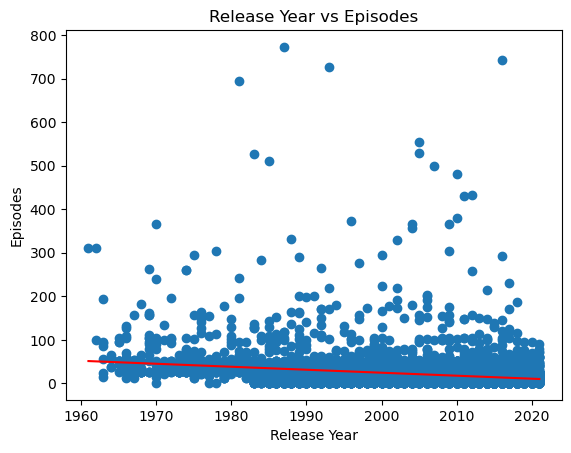

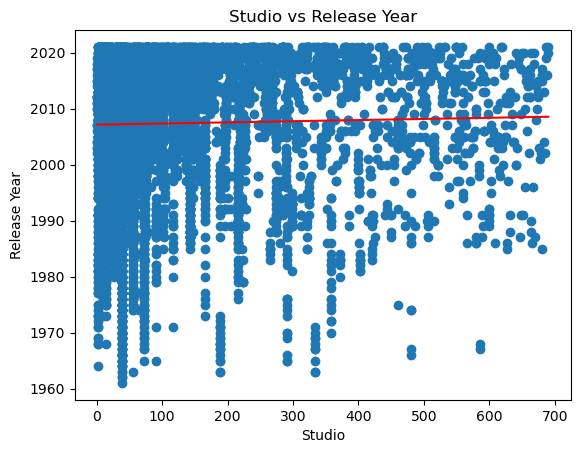

In [2957]:
##Multivariate Analysis

# Plot the data
plt.title('Episodes vs Rating')
plt.xlabel('Episodes')
plt.ylabel('Rating')
plt.scatter(data['Episodes'], data['Rating'])
plt.plot(np.unique(data['Episodes']), np.poly1d(np.polyfit(data['Episodes'], data['Rating'], 1))(np.unique(data['Episodes'])), color='red')
plt.show()

plt.title('Studio vs Rating')
plt.xlabel('Studio')
plt.ylabel('Rating')
plt.scatter(data['Studio_ID'], data['Rating'])
plt.plot(np.unique(data['Studio_ID']), np.poly1d(np.polyfit(data['Studio_ID'], data['Rating'], 1))(np.unique(data['Studio_ID'])), color='red')
plt.show()

plt.title('Release Year vs Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.scatter(data['Release_year'], data['Rating'])
plt.plot(np.unique(data['Release_year']), np.poly1d(np.polyfit(data['Release_year'], data['Rating'], 1))(np.unique(data['Release_year'])), color='red')
plt.show()

plt.title('Studio vs Episodes')
plt.xlabel('Studio')
plt.ylabel('Episodes')
plt.scatter(data['Studio_ID'], data['Episodes'])
plt.plot(np.unique(data['Studio_ID']), np.poly1d(np.polyfit(data['Studio_ID'], data['Episodes'], 1))(np.unique(data['Studio_ID'])), color='red')
plt.show()

plt.title('Release Year vs Episodes')
plt.xlabel('Release Year')
plt.ylabel('Episodes')
plt.scatter(data['Release_year'], data['Episodes'])
plt.plot(np.unique(data['Release_year']), np.poly1d(np.polyfit(data['Release_year'], data['Episodes'], 1))(np.unique(data['Release_year'])), color='red')
plt.show()

plt.title('Studio vs Release Year')
plt.xlabel('Studio')
plt.ylabel('Release Year')
plt.scatter(data['Studio_ID'], data['Release_year'])
plt.plot(np.unique(data['Studio_ID']), np.poly1d(np.polyfit(data['Studio_ID'], data['Release_year'], 1))(np.unique(data['Studio_ID'])), color='red')
plt.show()

In [2958]:
##Getting the PearsonRResult and the p-values


corr = pearsonr(data['Episodes'], data['Rating'])
print('Episodes vs Rating:', corr)

print("===============================================================================================")

corr = pearsonr(data['Studio_ID'], data['Rating'])
print('Studio vs Rating:', corr)

print("===============================================================================================")

corr = pearsonr(data['Release_year'], data['Rating'])
print('Release Year vs Rating:', corr)

Episodes vs Rating: PearsonRResult(statistic=0.10624168513644354, pvalue=3.88675987312317e-22)
Studio vs Rating: PearsonRResult(statistic=-0.3044476447633157, pvalue=2.0459150762392743e-176)
Release Year vs Rating: PearsonRResult(statistic=0.1196506486354551, pvalue=1.1105958705596376e-27)


In [2959]:
##Getting the coefficients of determination


model = LinearRegression().fit(data[['Episodes']], data['Rating'])
Rating = np.array([Ratings for Ratings in range(0, 100)]).reshape(-1, 1)
model.fit(data[['Episodes']], data['Rating'])
r_sq = model.score(data[['Episodes']], data['Rating'])
print('coefficient of determination:', r_sq)

print("==================================================")

model = LinearRegression().fit(data[['Studio_ID']], data['Rating'])
Rating = np.array([Ratings for Ratings in range(0, 100)]).reshape(-1, 1)
model.fit(data[['Studio_ID']], data['Rating'])
r_sq = model.score(data[['Studio_ID']], data['Rating'])
print('coefficient of determination:', r_sq)

print("==================================================")

model = LinearRegression().fit(data[['Release_year']], data['Rating'])
Rating = np.array([Ratings for Ratings in range(0, 100)]).reshape(-1, 1)
model.fit(data[['Release_year']], data['Rating'])
r_sq = model.score(data[['Release_year']], data['Rating'])
print('coefficient of determination:', r_sq)

coefficient of determination: 0.011287295660631136
coefficient of determination: 0.09268836840192929
coefficient of determination: 0.014316277718885217


In [2960]:
##Getting OLS Regression Results


episodes = data['Episodes']
episodes = sm.add_constant(episodes)
model = sm.OLS(data['Rating'], episodes).fit()
print(model.summary())
print(model.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     94.13
Date:                Sun, 05 May 2024   Prob (F-statistic):           3.89e-22
Time:                        20:44:57   Log-Likelihood:                -4467.5
No. Observations:                8247   AIC:                             8939.
Df Residuals:                    8245   BIC:                             8953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3617      0.005    644.975      0.0

In [2961]:
studio_id = data['Studio_ID']
studio_id = sm.add_constant(studio_id)
model = sm.OLS(data['Rating'], studio_id).fit()
print(model.summary())
print(model.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     842.3
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.05e-176
Time:                        20:44:57   Log-Likelihood:                -4113.2
No. Observations:                8247   AIC:                             8230.
Df Residuals:                    8245   BIC:                             8245.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4919      0.006    611.563      0.0

In [2962]:
release_year = data['Release_year']
release_year = sm.add_constant(release_year)
model = sm.OLS(data['Rating'], release_year).fit()
print(model.summary())
print(model.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     119.8
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.11e-27
Time:                        20:44:57   Log-Likelihood:                -4454.9
No. Observations:                8247   AIC:                             8914.
Df Residuals:                    8245   BIC:                             8928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.0152      0.768     -6.533   

In [2963]:
data = list(zip(data['Rating'], data['Episodes'], data['Studio_ID'], data['Release_year']))
print(data)

[(4.6, 13.0, 2, 2021.0), (4.58, 12.0, 3, 2021.0), (4.58, 64.0, 4, 2009.0), (4.57, 10.0, 5, 2019.0), (4.56, 24.0, 6, 2020.0), (4.55, 16.0, 6, 2020.0), (4.53, 10.0, 7, 2016.0), (4.51, 25.0, 7, 2015.0), (4.51, 26.0, 1, 2019.0), (4.51, 148.0, 9, 2011.0), (4.5, 12.0, 7, 2020.0), (4.5, 1.0, 11, 2021.0), (4.48, 12.0, 12, 2021.0), (4.48, 11.0, 13, 2019.0), (4.47, 25.0, 14, 2008.0), (4.46, 8.0, 3, 2019.0), (4.46, 11.0, 16, 2021.0), (4.46, 13.0, 4, 2019.0), (4.46, 13.0, 7, 2020.0), (4.45, 25.0, 17, 2020.0), (4.45, 12.0, 18, 2019.0), (4.45, 12.0, 12, 2021.0), (4.45, 11.0, 11, 2020.0), (4.45, 12.0, 20, 2021.0), (4.44, 14.0, 15, 2018.0), (4.44, 24.0, 10, 2008.0), (4.44, 15.0, 3, 2018.0), (4.44, 13.0, 14, 2012.0), (4.44, 24.0, 6, 2018.0), (4.44, 16.0, 21, 2018.0), (4.44, 12.0, 15, 2017.0), (4.44, 12.0, 15, 2018.0), (4.44, 12.0, 5, 2018.0), (4.44, 24.0, 22, 2011.0), (4.43, 25.0, 7, 2014.0), (4.43, 51.0, 14, 2011.0), (4.43, 12.0, 9, 2015.0), (4.43, 51.0, 15, 2015.0), (4.43, 11.0, 23, 2017.0), (4.43, 3

In [2964]:
data = pd.DataFrame(data, columns=['Rating', 'Episodes', 'Studio_ID', 'Release_year'])
model = sm.OLS(data['Rating'], data).fit()
print(model.summary())
print(model.scale**0.5)

                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.396e+30
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        20:44:58   Log-Likelihood:                      2.4079e+05
No. Observations:                8247   AIC:                                 -4.816e+05
Df Residuals:                    8243   BIC:                                 -4.815e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [2965]:
##Mean squared error


#Combining all the data
all_data = data[['Rating', 'Episodes', 'Studio_ID', 'Release_year']]
print(all_data)

# Calculating the mean squared error
all_data = sm.add_constant(all_data)
model = sm.OLS(data['Rating'], all_data).fit()
print(model.summary())
print("Mean Squared Error: ", model.scale**0.5)

      Rating  Episodes  Studio_ID  Release_year
0       4.60      13.0          2        2021.0
1       4.58      12.0          3        2021.0
2       4.58      64.0          4        2009.0
3       4.57      10.0          5        2019.0
4       4.56      24.0          6        2020.0
...      ...       ...        ...           ...
8242    1.39       1.0         38        2012.0
8243    1.30      12.0        690        2021.0
8244    1.11       1.0        255        2005.0
8245    0.96       1.0        515        2004.0
8246    3.49       1.0         30        2021.0

[8247 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.192e+27
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time

In [2966]:
##Normalization


#Normalizing the rating column
data['Rating'] = (data['Rating'] - data['Rating'].min()) / (data['Rating'].max() - data['Rating'].min())
print(data['Rating'])

0       1.000000
1       0.994505
2       0.994505
3       0.991758
4       0.989011
          ...   
8242    0.118132
8243    0.093407
8244    0.041209
8245    0.000000
8246    0.695055
Name: Rating, Length: 8247, dtype: float64


In [2967]:
##Weighting and Aggregation


# Weighting the columns
data['Weighted_Rating'] = data['Rating'] * 0.6
data['Weighted_Episodes'] = data['Episodes'] * 0.2
data['Weighted_Release_year'] = data['Release_year'] * 0.2

#Aggregating by Studio_ID
studio_grouped = data.groupby('Studio_ID').agg({
    'Weighted_Rating': 'mean',
    'Weighted_Episodes': 'mean',
    'Weighted_Release_year': 'mean'
}).reset_index()

print(studio_grouped)

     Studio_ID  Weighted_Rating  Weighted_Episodes  Weighted_Release_year
0            1         0.431604           1.856000             402.144000
1            2         0.421703           5.623958             399.940625
2            3         0.532418           4.142857             403.942857
3            4         0.471346           3.255000             402.515000
4            5         0.490154           2.280000             403.400000
..         ...              ...                ...                    ...
606        686         0.220879           2.400000             403.800000
607        687         0.220879           2.600000             404.200000
608        688         0.209341           0.200000             403.200000
609        689         0.159890           2.600000             404.000000
610        690         0.056044           2.400000             404.200000

[611 rows x 4 columns]


     Studio_ID  Weighted_Rating  Weighted_Episodes  Weighted_Release_year  \
0            1         0.431604           1.856000             402.144000   
1            2         0.421703           5.623958             399.940625   
2            3         0.532418           4.142857             403.942857   
3            4         0.471346           3.255000             402.515000   
4            5         0.490154           2.280000             403.400000   
..         ...              ...                ...                    ...   
606        686         0.220879           2.400000             403.800000   
607        687         0.220879           2.600000             404.200000   
608        688         0.209341           0.200000             403.200000   
609        689         0.159890           2.600000             404.000000   
610        690         0.056044           2.400000             404.200000   

     Composite_Score  
0         404.431604  
1         405.986287  
2     

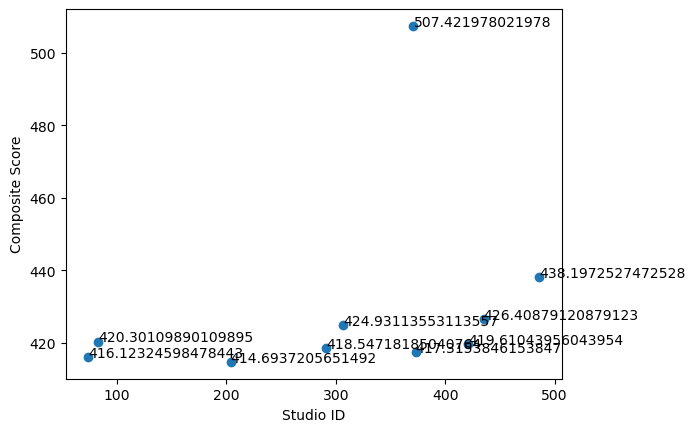

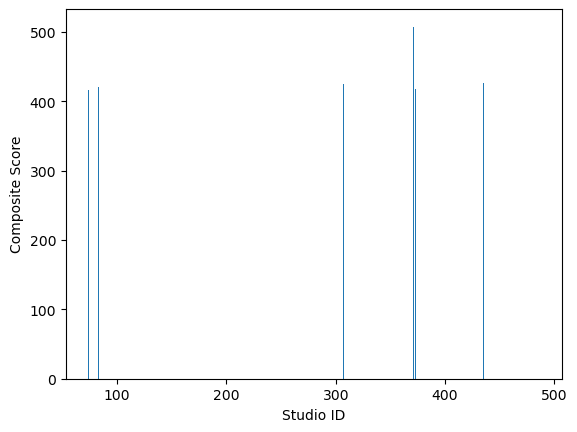

     Studio_ID  Weighted_Rating  Weighted_Episodes  Weighted_Release_year  \
335        371         0.421978              106.0                  401.0   

     Composite_Score  
335       507.421978  
The top studio in terms of avg rating is:  Creative Power Entertaining


c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


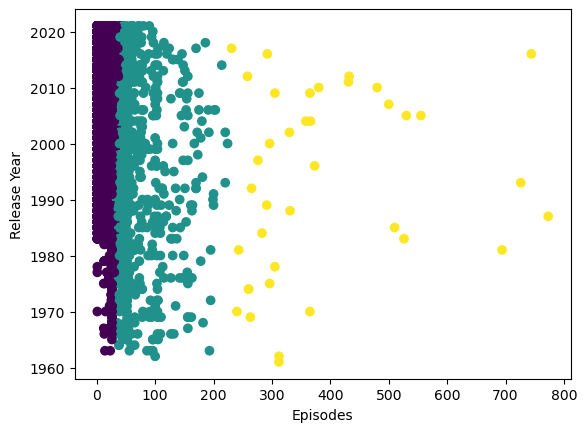

Cluster
0    7041
1    1168
2      38
Name: count, dtype: int64
2762


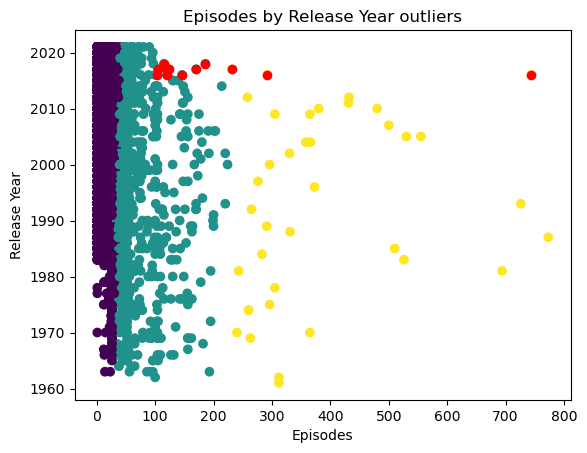

In [2968]:
##Getting final composite score


studio_grouped['Composite_Score'] = studio_grouped['Weighted_Rating'] + studio_grouped['Weighted_Episodes'] + studio_grouped['Weighted_Release_year']
print(studio_grouped)

print("=====================================================================================================")

#Getting the top 10 studios
top_studios = studio_grouped.nlargest(10, 'Composite_Score')
print(top_studios)

print("=====================================================================================================")

#Plotting the top 10 studios using a scatter plot with exact values written on the plot with labels on both axes
plt.scatter(top_studios['Studio_ID'], top_studios['Composite_Score'])
plt.xlabel('Studio ID')
plt.ylabel('Composite Score')
for i, txt in enumerate(top_studios['Composite_Score']):
    plt.annotate(txt, (top_studios['Studio_ID'].values[i], top_studios['Composite_Score'].values[i]))
plt.show()

#Bar plot of the top 10 studios with wider bars
plt.bar(top_studios['Studio_ID'], top_studios['Composite_Score'], width=0.5)
plt.xlabel('Studio ID')
plt.ylabel('Composite Score')
plt.show()

print("=====================================================================================================")
top_studio = top_studios.nlargest(1, 'Composite_Score')
print(top_studio)

print("=====================================================================================================")

top_studio_name = {v: k for k, v in studio_dict.items()}[top_studio['Studio_ID'].values[0]]
print("The top studio in terms of avg rating is: ", top_studio_name)

print("=====================================================================================================")

#k-means clustering model to find how the release year and episodes are related on a scatter plot
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['Episodes', 'Release_year']])
data['Cluster'] = kmeans.labels_
plt.scatter(data['Episodes'], data['Release_year'], c=data['Cluster'])
plt.xlabel('Episodes')
plt.ylabel('Release Year')
plt.show()

#Print out the number of data points in each cluster
print(data['Cluster'].value_counts())

#Finding the number of shows in cluster 0 that have a release year of 2015 or later
cluster0 = data[data['Cluster'] == 0]
cluster0 = cluster0[cluster0['Release_year'] >= 2015]
cluster0_count = cluster0.shape[0]
print(cluster0_count)

#Using the data, finding some outliers such as shows with a high number of episodes that were released recently
outliers = data[(data['Episodes'] > 100) & (data['Release_year'] > 2015)]
plt.scatter(data['Episodes'], data['Release_year'], c=data['Cluster'])
plt.scatter(outliers['Episodes'], outliers['Release_year'], color='red')
plt.title('Episodes by Release Year outliers')
plt.xlabel('Episodes')
plt.ylabel('Release Year')
plt.show()

<ul>
    <li>My Anime list or MAL for short allows user to see the top rated anime shows: https://myanimelist.net/topanime.php</li>
    <li>LiveChart.me allows users to see when anime were release, the amount of episodes an anime has, all the shows that a studio has produced, and the average user score: https://www.livechart.me/spring-2024/tv</li>
<ul>
